In [18]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
retail=pd.read_csv('C:/Users/admin/Downloads/Global+Superstore+Data.csv')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [13]:
retail.shape

(51290, 5)

In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [14]:
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [16]:
retail.nunique().sort_values()

Segment           3
Market            7
Order Date     1430
Sales         22995
Profit        24575
dtype: int64

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


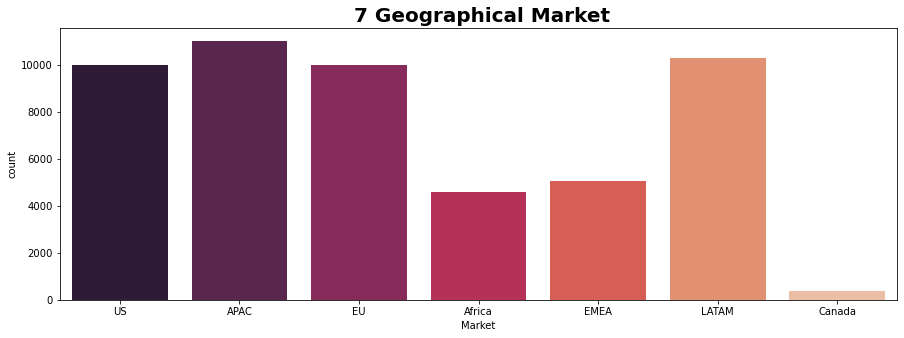

In [20]:
plt.figure(figsize=(15,5))
print(retail.Market.value_counts())
sns.countplot(retail['Market'], palette='rocket')
plt.title(' 7 Geographical Market', fontweight='bold', size=20)
plt.show()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


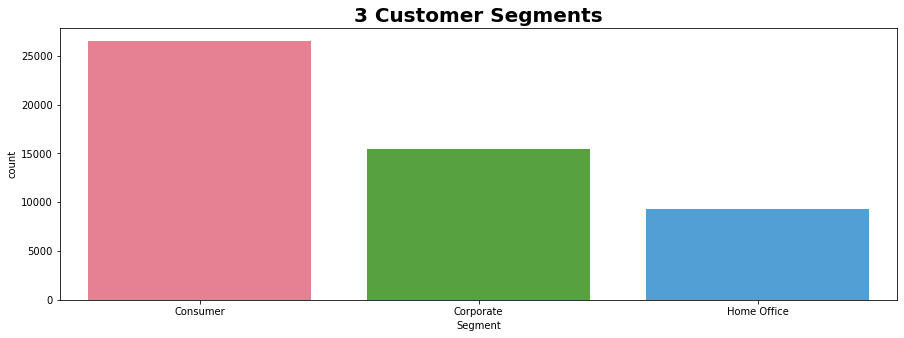

In [21]:
plt.figure(figsize=(15,5))
print(retail.Segment.value_counts())
sns.countplot(retail['Segment'], palette='husl')
plt.title('3 Customer Segments',fontweight='bold', size=20)
plt.show()

In [22]:
retail['Market_Segment']= retail['Market']+'_' +retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segment, dtype: int64


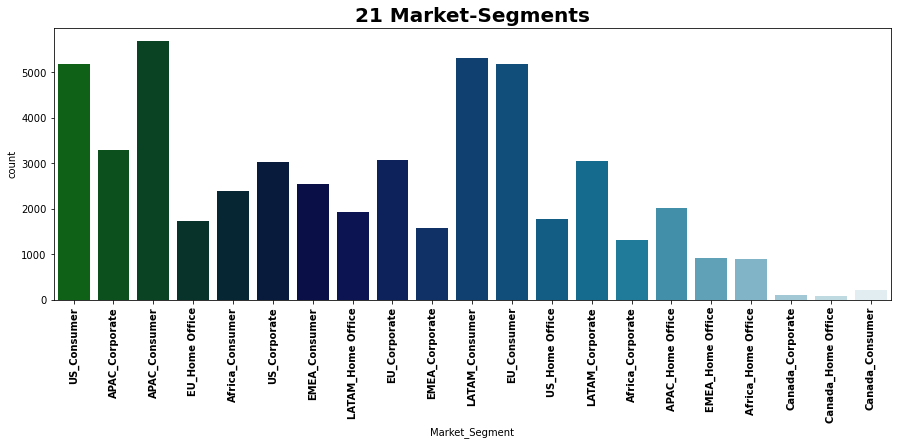

In [23]:
plt.figure(figsize=(15,5))
print(retail.Market_Segment.value_counts())
sns.countplot(retail['Market_Segment'], palette='ocean')
plt.title('21 Market-Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

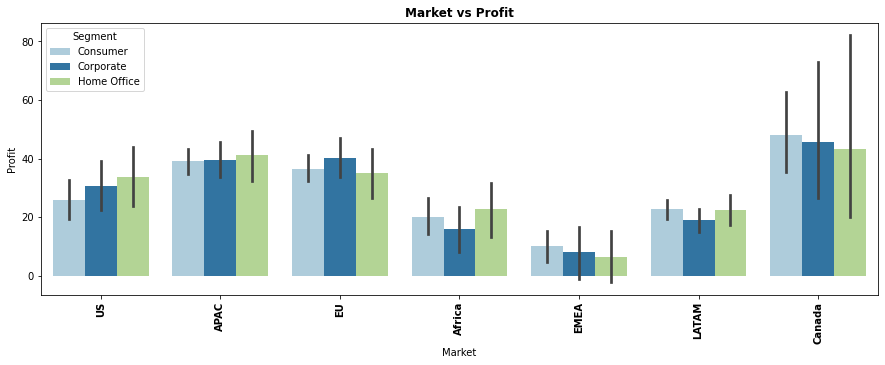

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=retail, palette='Paired')
plt.title('Market vs Profit', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

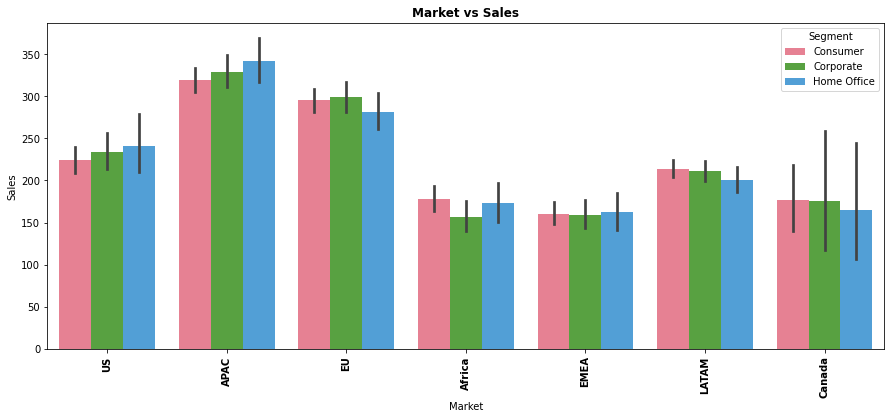

In [25]:
#sales and marketwise segment 
plt.figure(figsize=(15,6))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=retail, palette='husl')
plt.title('Market vs Sales', fontweight='bold')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [26]:
#finding most profitable segment
retail=retail.drop(['Market','Segment'],axis=1)
retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [27]:
#converting order_date to date_time
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')
retail= retail.sort_values(by=['Order Date'])
retail.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [28]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 15262 to 541
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Sales           51290 non-null  float64  
 2   Profit          51290 non-null  float64  
 3   Market_Segment  51290 non-null  object   
dtypes: float64(2), object(1), period[M](1)
memory usage: 2.0+ MB


In [29]:
retail_profit= retail.pivot_table( index='Order Date',values='Profit', columns='Market_Segment' ,aggfunc='sum')
retail_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [30]:
retail_profit.shape

(48, 21)

In [33]:
#now we will perform the train-test split such that , we could have the 42 months as the train data and the 6 months as the test data.
train_len = 42
train = retail_profit[0:train_len] # first 42 months as training set
test = retail_profit[train_len:] # last 6 months as test set

In [34]:
train.shape

(42, 21)

In [35]:
train.head()


Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [36]:
#calculating CoV using testdata

mean=np.mean(train)
std= np.std(train)
CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segment', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


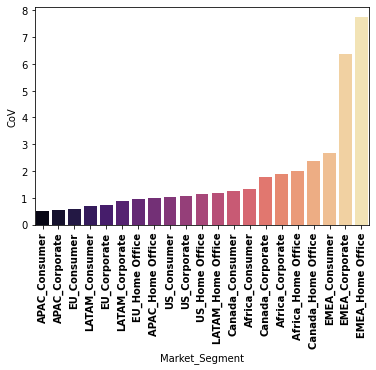

In [37]:
sns.barplot(x='Market_Segment', y= 'CoV', data=CoV_df, palette='magma')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

In [38]:
retail['Order Date'].dtype

period[M]

In [39]:
retail['Order Date'] = retail['Order Date'].astype(str)
retail['Order Date']=pd.to_datetime(retail['Order Date'])


In [40]:
retail['Order Date'].dtype

dtype('<M8[ns]')

In [41]:
retail.shape


(51290, 4)

In [42]:
retail.head()


,Order Date,Sales,Profit,Market_Segment
15262,2011-01-01,139.65,15.30,EU_Corporate
26744,2011-01-01,88.44,15.84,EU_Consumer
48614,2011-01-01,11.43,4.11,EU_Corporate
9417,2011-01-01,491.00,122.70,LATAM_Consumer
48590,2011-01-01,4.71,0.00,US_Home Office


In [43]:
retail_df= retail[(retail.Market_Segment=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [44]:
retail_df.shape


(5699, 4)

In [45]:
data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [46]:
data.shape

(48, 1)

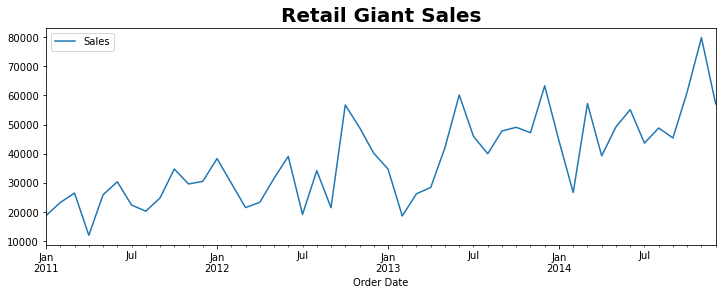

In [47]:
#TIMESERIES ANALYSIS
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)

In [48]:
data.isnull().sum()

Sales    0
dtype: int64

In [49]:
train_len = 42
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

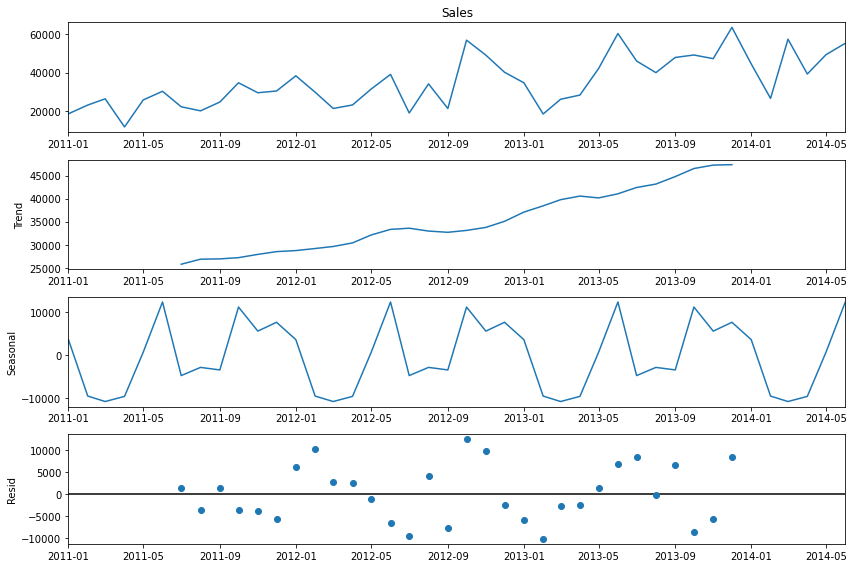

In [51]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive')
# additive seasonal index

fig = decomposition.plot()
plt.show()

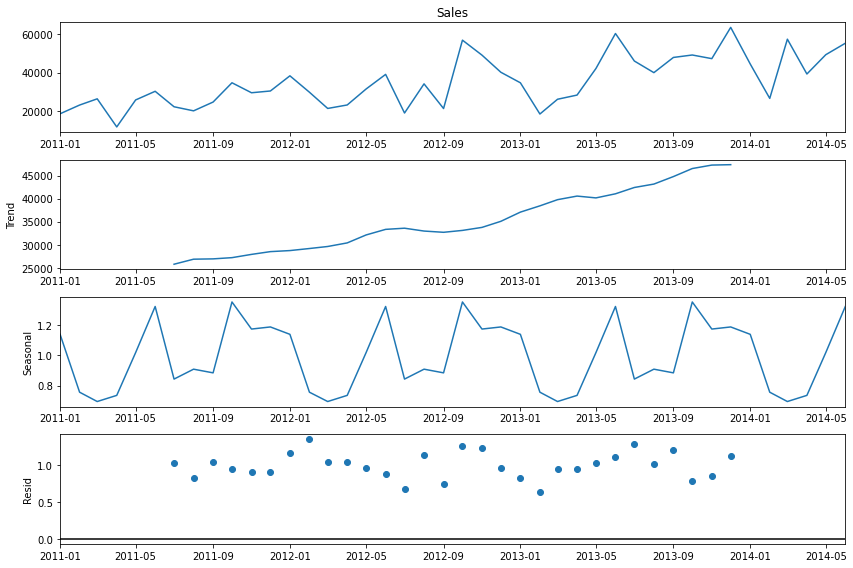

In [52]:
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [57]:
#NAIVE METHOD
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1] #Last observation in the train data

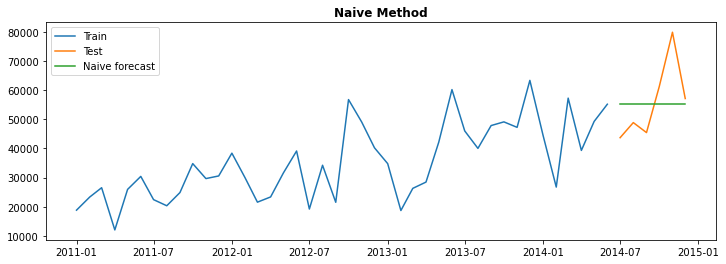

In [58]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

In [59]:
#CALCULATING RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


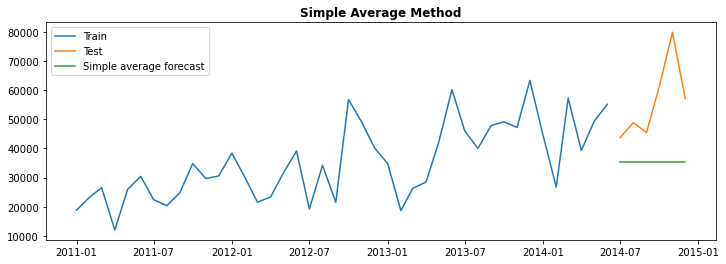

In [60]:
### Simple average method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()# Average of past months sales
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

In [61]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


In [ ]:
y_hat_sma = data.copy()
ma_window = 3  # Considered 3 month window
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

NameError: name 'y_hat_sma' is not defined

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


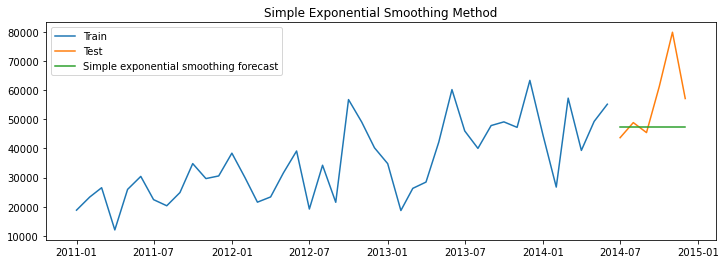

In [54]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [63]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18638.66351999999, 'initial_trend': 964.8086345454557, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


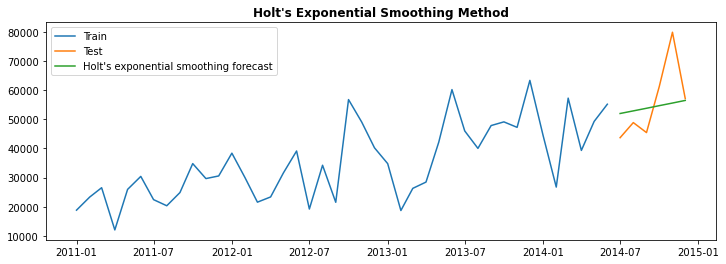

In [65]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

In [66]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,11456.45,14.64


In [67]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([  3952.88057396,  -9211.53080729, -10479.58736354,  -9282.54725729,
         1016.15604896,  12737.03211146,  -8578.55198854,  -2357.83653854,
        -6344.09922604,  15891.83603021,   8787.51308021,   3868.73533646]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


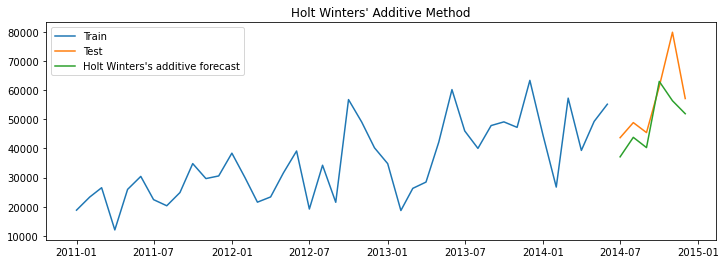

In [68]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [69]:
### Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02


In [70]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25546.140294166653, 'initial_trend': 468.00483560606244, 'initial_seasons': array([1.14330212, 0.76036851, 0.69869713, 0.73937527, 1.02255778,
       1.32751953, 0.72524578, 0.90263868, 0.79512941, 1.50506931,
       1.26466724, 1.11542925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


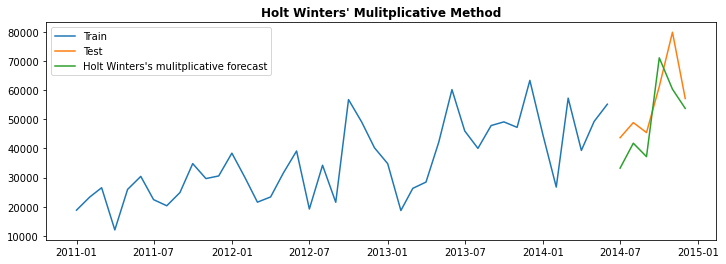

In [71]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [72]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17


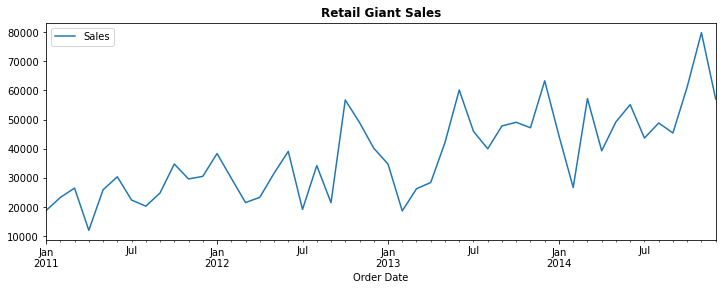

In [73]:
#Stationarity vs non-stationary time series

data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

In [74]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


In [75]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.103752
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


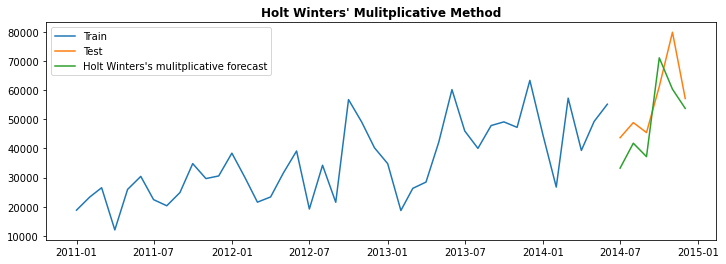

In [77]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [78]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Holt Winters' multiplicative method,10931.27,17.17


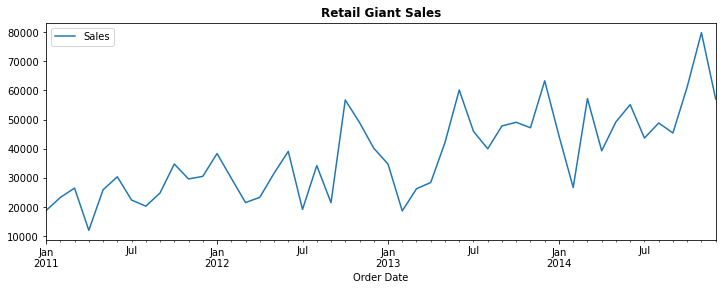

In [79]:
#Stationarity vs non-stationary time series

data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

In [80]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


In [81]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.103752
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


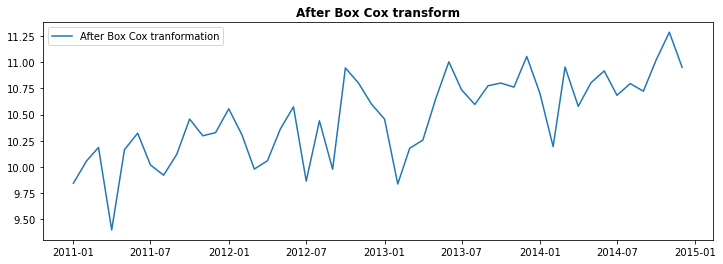

In [82]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

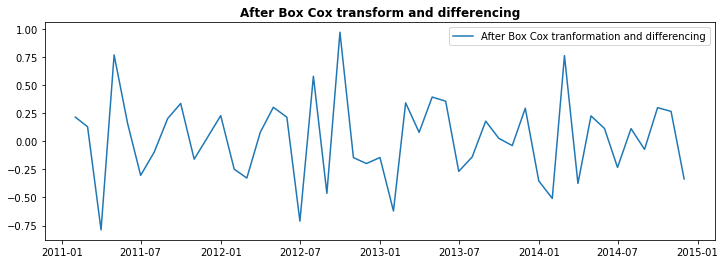

In [83]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [100]:
data_boxcox_diff.dropna(inplace=True)


In [101]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

In [102]:
#Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [103]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.103752
Critical Values @ 0.05: 0.46
p-value: 0.010000


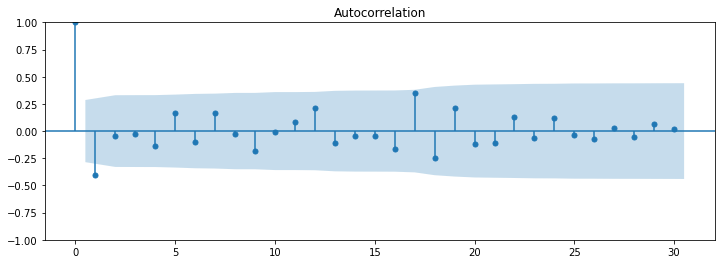

In [106]:
#Autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

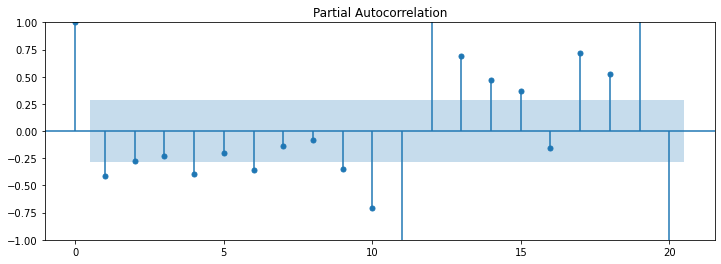

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 20)
plt.show()

In [107]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1      -0.041851
ma.L1      -0.996000
ar.S.L12    0.099125
ma.S.L12   -0.957885
sigma2      0.059078
dtype: float64


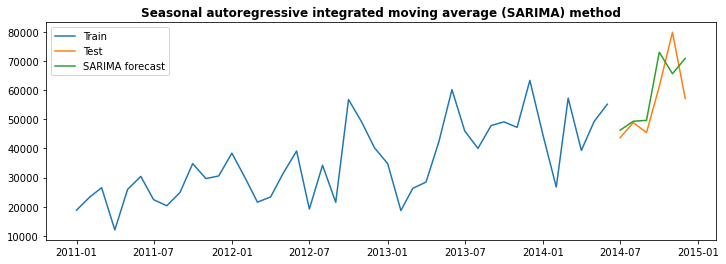

In [111]:
#Recover original time series forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

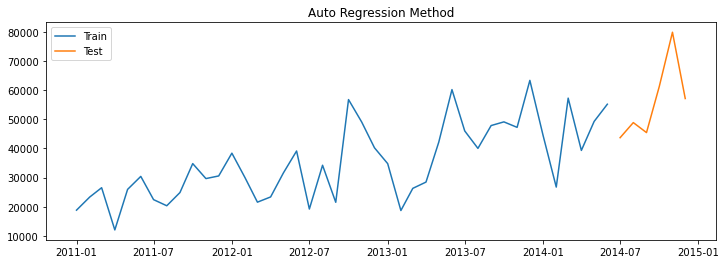

In [112]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [113]:
#Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,11456.45,14.64
0,Holt Winters' additive method,10624.26,13.02
0,Holt Winters' multiplicative method,10931.27,17.17
0,Holt Winters' multiplicative method,10931.27,17.17
0,(SARIMA) Seasonal autoregressive integrated mo...,9616.66,12.87


# Conclusion
Thus we can conclude that, Holt Winters additive method is the best forecasting method in the smoothing technique And SARIMA - Seasonal Autoregressive Integrated moving average is the best method in ARIMA set of techniques.